In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 출력한 내용 청소
from IPython.display import clear_output

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 랜덤 모듈
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면...
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

### 로지스틱 회귀
- 선형회귀를 통해 예측선을 찾고 그선을 경계선으로 사용하여 분류 예측한다.
- 경계선의 정확도를 위해 sigmoid 함수를 이용하여 직선을 S자로 형 선으로 변경한여 경게선을 확정한다.
- 사실 로지스틱 회귀는 경계선이 아닌 데이터를 가장 일반화 할 수 있는 선형 회귀 예측선을 찾는다.
- 결과데이터가 0과 1로만 구성되어 있는 데이터를 사용하기 때문에 학습이 잘 되었다면 대부분의 예측값은 0에 가까운 값이나 1과 가까운 값이 계산된다.
- 허나 0보다 작거나 1보다 큰 값이 발생할 수 밖에 없고 0.2~0.8 사이의 값이 많이 존재 할수 밖에는 없다.
- 이렇게 선형회귀를 통해 계산된 값을 sigmoid 함수를 통해 다시 계산하여 대부분의 값을 0과 가까운값, 1과 가까운 값으로 다시 계산해주고 0.2~0.8 사이의 값의 개수를 최소화하여 분류 예측 문제를 해결할 수 있다.

In [2]:
# 데이터
공부한시간 = [2, 4, 6, 8, 10, 12, 14]
합격여부 = [0, 0, 0, 1, 1, 1, 1]

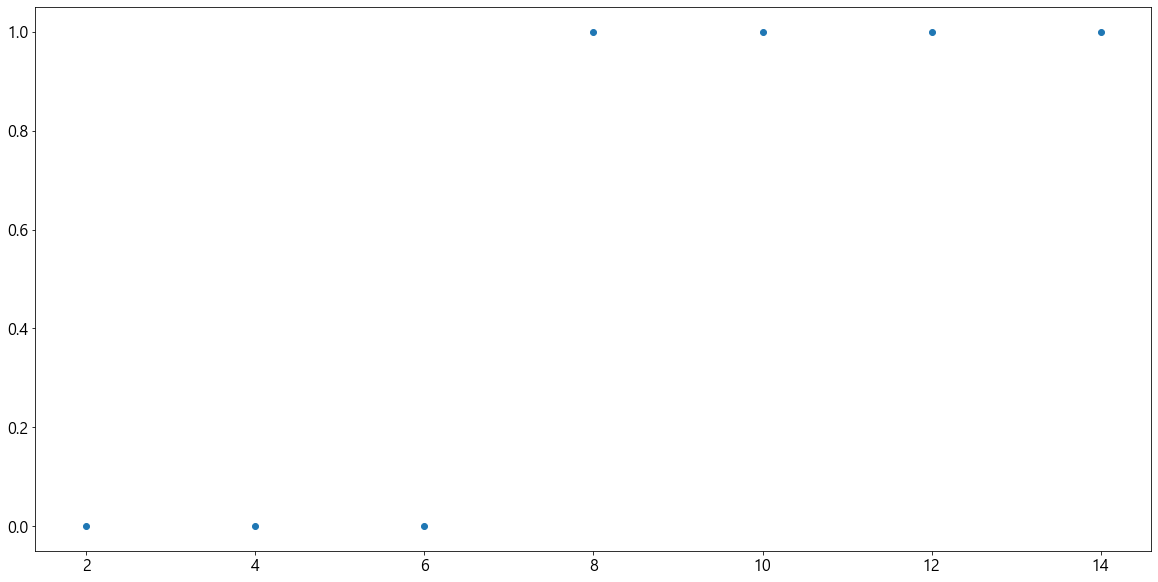

In [3]:
plt.scatter(공부한시간, 합격여부)
plt.show()

In [4]:
# 가중치와 바이어스
a = 0
b = 0

In [5]:
# 학습률
lr = 0.001

In [6]:
# 학습 횟수
epochs = 1000000

In [7]:
#시그모이드 함수
def sigmoid(x) :
    return 1 / (1 + np.e ** (-x))

In [8]:
# ndarray를 생성한다.
x_data = np.array(공부한시간)
y_data = np.array(합격여부)

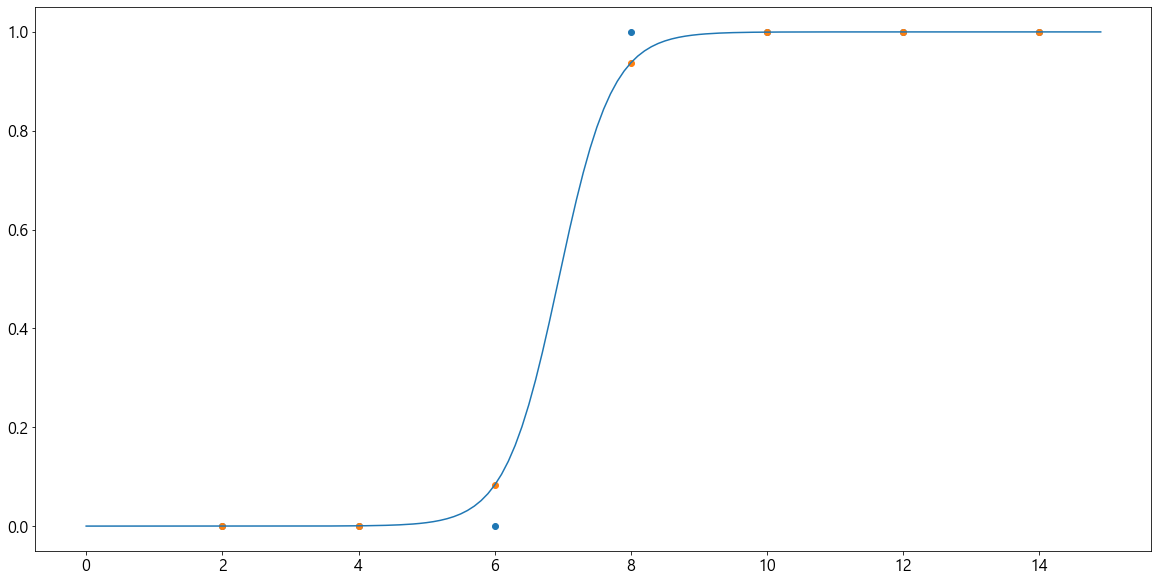

epochs : 999900, 가중치 : 2.5548955438112557, 바이어스 : -17.73040832233466


In [9]:
# 학습한다.
# 학습 횟수 만큼 반복한다.
for i in range(epochs) :
    # 현재의 가중치와 바이어스로 결과를 예측한다.
    y_pred = sigmoid(a * x_data + b)
    # print(y_pred)
    
    # 진짜 결과와 예측 결과의 오차를 구한다.
    error = y_data - y_pred
    # print(error)
    
    # 가중치를 미분한다.
    a_diff = -(2 / len(x_data)) * sum(x_data * error)
    # 바이어스를 미분한다.
    b_diff = -(2 / len(x_data)) * sum(error)
    
    # 가중치와 바이어스를 업데이트 한다.
    a = a - (lr * a_diff)
    b = b - (lr * b_diff)
    
    if i % 100 == 0 :
        clear_output(wait=True)
        
        plt.scatter(공부한시간, 합격여부, label='원본')
        plt.scatter(공부한시간, y_pred, label='예측')
        # 예측선을 그리기 위해 0~15까지 0.1씩 증가하는 값을 입력데이터로 사용한다.
        x_range = np.arange(0, 15, 0.1)
        y_range = sigmoid(a * x_range + b)
        plt.plot(x_range, y_range)
        plt.show()
        
        print(f'epochs : {i}, 가중치 : {a}, 바이어스 : {b}')

In [13]:
# 예측
y_pred = sigmoid(a * x_data + b)

y_pred2 = (y_pred > 0.5).astype(int)
y_pred2

array([0, 0, 0, 1, 1, 1, 1])

In [14]:
합격여부

[0, 0, 0, 1, 1, 1, 1]